In [1]:
%pip install matplotlib
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
def f(x):
    return 3*x**2 - 4*x + 2

In [3]:
f(3.0)

17.0

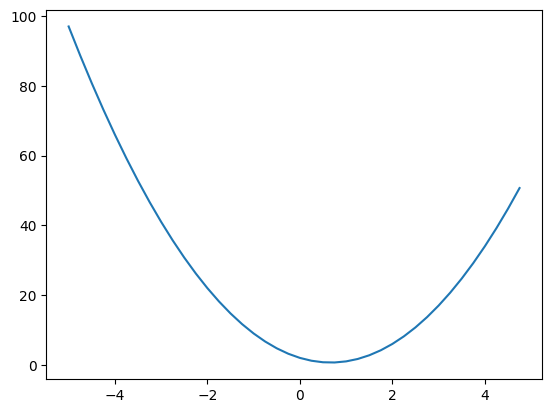

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
h = 0.001
x= 3
(f(x+h) - f(x))/h

14.00300000000243

In [6]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print ('d2', d2)
print('slope', (d2-d1)/h)


d1 4.0
d2 4.0002
slope 2.0000000000042206


In [61]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out
        
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L 

Value(data=-8.0)

In [8]:
%pip install graphviz
from graphviz import Digraph

Note: you may need to restart the kernel to use updated packages.


In [45]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
#     assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad ), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

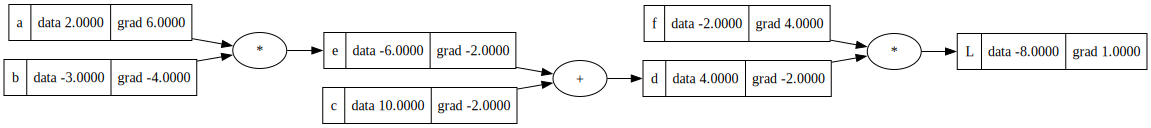

In [50]:
draw_dot(L)

In [ ]:
# L = d * f 
# dL/dd = ?

# (f(x+h) -f(x))/h
# ((d+h)*f - d*f)/h
# (d*f + h*f - df)/h
# (h*f)/h
# f




In [49]:
L.grad = 1.0
d.grad = -2.0
f.grad = 4.0
c.grad = -2.0
e.grad = -2.0
a.grad = 6.0
b.grad = -4.0

In [54]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad 

e = a * b
d = e + c
L = f * d

print(L.data)


-6.586368000000001


In [ ]:
# dd / dc ? 1.0
# dd / de ? 1.0
# d = c + e

# # chain rule
# dL / dc = (dL/dd) * (dd/dc)
# dL/da = (dL/de) * (de/da)
# dL/da = -2.0 * b ? 6.0
# dL/db = -2.0 * a ? -4.0

In [52]:
# derivative function 
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10 , label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
#     d.data += h
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data
    
    print((L2 - L1)/h)

lol()

-3.9999999999995595


In [56]:
# https://cs231n.github.io/assets/nn1/neuron_model.jpeg

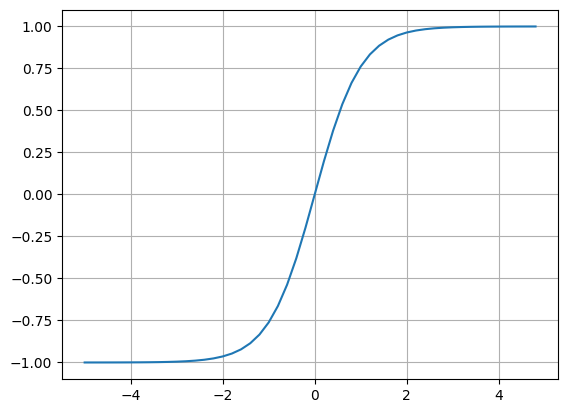

In [58]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [75]:
# inputs x1, x2 
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of neuron
b = Value(6.8813735870195432, label='b')
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

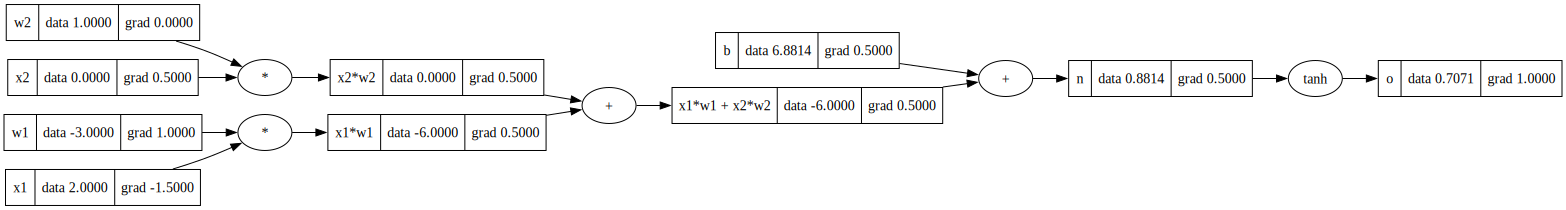

In [81]:
draw_dot(o)

In [80]:
o.grad = 1.0
n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x2w2.grad = 0.5
x1w1.grad = 0.5
w2.grad = 0
x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data
w1.grad = 0.5 * x1.data
x1.grad = 0.5 * w1.data



In [72]:
1- (o.data)**2

0.4999999999999999

In [ ]:
# o = tanh(n)
# do/dn = (do/do) * (do/dn) 
# n.grad = 1 * (1-(tanh(n))**2)
# n.grad = 1 * (1-(o)**2)
# dL/dw2 = (dL/dx2w2) * (dx2w2/dw2)
# dL/dw2 = 0.5 * x2 
# dL/dw2 = 0.5 * 0
# dL/dw2 = 0
# dL/dx2 = (dL/dx2w2) * (dx2w2/dx2)
# dL/dx2 = 0.5 * w2
# dL/dx2 = 0.5 * 1
# dL/dx2 = 0.5
# dL/dw1 = (dL/dx1w1) * (dx1x1/dw1)
# dL/dw1 = 0.5 * x1
# dL/dw1 = 0.5 * 2
# dL/dw1 = 1
